In [73]:
%matplotlib inline
import math,sys, os, numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [74]:
# Boiler plate code that can be stolen from internet 
def plots(ims, interp=False, titles=None):  #ims
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):   # im 
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [75]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784')

In [76]:
class Decide:
    def __init__(self, name):
        self.name = name
    pass

a = Decide('abhimanyu')

In [85]:
mnist.keys() # 70k images 784 array [] [28][28]

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [81]:
mnist['data'].shape #784 flat array [234,34,4,445] 

(70000, 784)

In [86]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [88]:
my_tuple = (1234,4,5,65)
# immutable 

In [91]:
def hello(first_name="abhimanyu", last_name="aryan"):
    print("Hey buddy", first_name, last_name)
    
hello("abi", "aryan")

Hey buddy abi aryan


In [101]:
internet_status = {'my_code': 404, 'error': 'Request Timeout'}

In [105]:
type(mnist['target'][1])

str

In [160]:
images = np.reshape(mnist['data'], (70000, 28, 28), {})   # 1 image 784 
labels = mnist['target'].astype(int) # for label we are converting them into integers
n = len(images) #arrays, sets, tuple, dictionary 
images.shape, labels.shape, n

((70000, 28, 28), (70000,), 70000)

In [161]:
labels[:5]

array([5, 0, 4, 1, 9])

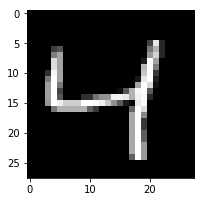

In [162]:
plot(images[2])   # 28 x 28

In [163]:
images = images/255 #why? it would work properly but it comes up later when
# we use correlate so we are trying convert them into numbers b/w 0 & 1.
# it would still work 0, 255. ...kind a way of normalising 

# rachael bhunde hai moo aali ne khud ni bera toh confuse kar diya...dhamchi ne


# why images are divided by 255 to normalize  normalization is conversion between 0-1 so that you can later
# apply sigmoid function on that

In [164]:
images[0].shape

(28, 28)

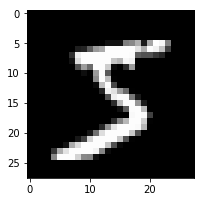

In [165]:
plot(images[0])

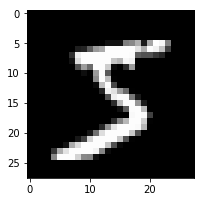

In [166]:
plt.imshow(images[0])

In [167]:
labels[0]

5

In [168]:
my_array = [4,3,34,43,4334,2343]

In [169]:
my_array[0:]

[4, 3, 34, 43, 4334, 2343]

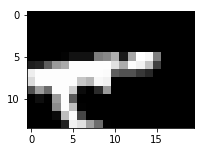

In [170]:
plot(images[0, 0:14, 8:28]) # we can also zoom in...

# Edge detection

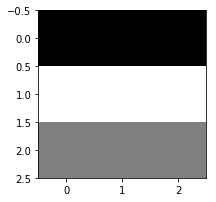

In [171]:
# we will look at how to crate an edge detector

#input * Filter 

top = [[-1,-1,-1],
       [ 1, 1, 1],
       [ 0, 0, 0]]

plot(top)

In [180]:
np.index_exp??

Type:        IndexExpression
String form: <numpy.lib.index_tricks.IndexExpression object at 0x106fa22e8>
File:        ~/anaconda/lib/python3.6/site-packages/numpy/lib/index_tricks.py
Source:     
class IndexExpression(object):
    """
    A nicer way to build up index tuples for arrays.

    .. note::
       Use one of the two predefined instances `index_exp` or `s_`
       rather than directly using `IndexExpression`.

    For any index combination, including slicing and axis insertion,
    ``a[indices]`` is the same as ``a[np.index_exp[indices]]`` for any
    array `a`. However, ``np.index_exp[indices]`` can be used anywhere
    in Python code and returns a tuple of slice objects that can be
    used in the construction of complex index expressions.

    Parameters
    ----------
    maketuple : bool
        If True, always returns a tuple.

    See Also
    --------
    index_exp : Predefined instance that always returns a tuple:
       `index_exp = IndexExpression(maketuple=True)`.

In [181]:
dims = np.index_exp[10:28:1, 3:13]   # indexing 
images[0][dims]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0549, 0.0039, 0.6039, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5451, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0431, 0.7451],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1373],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1529],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0941, 0.4471, 0.8667],
       [0.    , 0.   

In [182]:
corrtop = correlate(images[0], top)

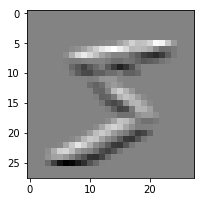

In [183]:
plot(corrtop)

In [21]:
#what's going on top filter
"""
How could we maximize top with something
element wise multiplication...filter to element wise
"""

'\nHow could we maximize top with something\nelement wise multiplication...filter to element wise\n'

In [22]:
# convolution vs correlation
# convolutions are just flipped ........kind of same
# rotated read this shit....rachel is shit...kaamini this is different from correlation statistics between differnet variables 

In [184]:
np.rot90(top,1) # write this yourself

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

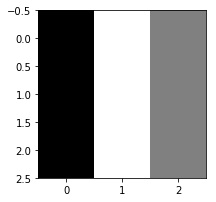

In [185]:
plot(np.rot90(top,1))

In [186]:
np.rot90(top,2)

array([[ 0,  0,  0],
       [ 1,  1,  1],
       [-1, -1, -1]])

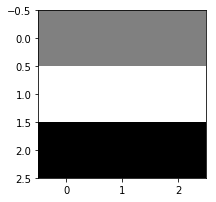

In [187]:
plot(np.rot90(top,2))

'\nConvolution is correlation with the filter rotated 180 degrees. \nThis makes no difference, if the filter is symmetric, like a Gaussian, \nor a Laplacian. But it makes a whole lot of difference, when the filter is not symmetric, like a derivative.\nThe reason we need convolution is that it is associative, while correlation, \nin general, is not. To see why this is true, remember that convolution is multiplication\nin the frequency domain, which is obviously associative. On the other hand, correlation in\nthe frequency domain is multiplication by the complex conjugate, which is not associative.\nThe associativity of convolution is what allows you to "pre-convolve" the filters, so that\nyou only need to convolve the image with a single filter. For example, let\'s say you have an image 𝑓,\nwhich you need to convolve with 𝑔 and then with ℎ. 𝑓∗𝑔∗ℎ=𝑓∗(𝑔∗ℎ). That means you can convolve 𝑔 and ℎ first\ninto a single filter, and then convolve 𝑓 with it. This is useful, if you need to convolve

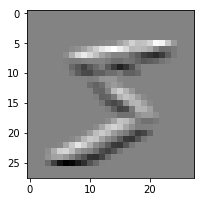

In [190]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop) # it's rotated so it's same thing 

"""
Convolution is correlation with the filter rotated 180 degrees. 
This makes no difference, if the filter is symmetric, like a Gaussian, 
or a Laplacian. But it makes a whole lot of difference, when the filter is not symmetric, like a derivative.
The reason we need convolution is that it is associative, while correlation, 
in general, is not. To see why this is true, remember that convolution is multiplication
in the frequency domain, which is obviously associative. On the other hand, correlation in
the frequency domain is multiplication by the complex conjugate, which is not associative.
The associativity of convolution is what allows you to "pre-convolve" the filters, so that
you only need to convolve the image with a single filter. For example, let's say you have an image 𝑓,
which you need to convolve with 𝑔 and then with ℎ. 𝑓∗𝑔∗ℎ=𝑓∗(𝑔∗ℎ). That means you can convolve 𝑔 and ℎ first
into a single filter, and then convolve 𝑓 with it. This is useful, if you need to convolve many 
images with 𝑔 and ℎ. You can pre-compute 𝑘=𝑔∗ℎ, and then reuse 𝑘 multple times.
So if you are doing template matching, i. e. looking for a single template,
correlation is sufficient. But if you need to use multiple filters in succession, and you
need to perform this operation on multiple images, it makes sense to convolve the multiple filters 
into a single filter ahead of time.
"""

In [191]:
# np.rot90

In [29]:
# Algorithm rotate a matrix by 90

a = [[1,2,3],[14,5,6], [34,4,6]]
# rotate it by 90 degrees

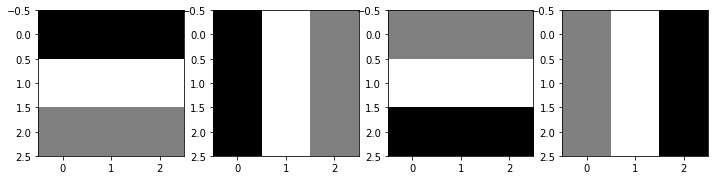

In [193]:
straights = [np.rot90(top,i) for i in range(4)]   # Edge detection for top, left, bottom, right
plots(straights)

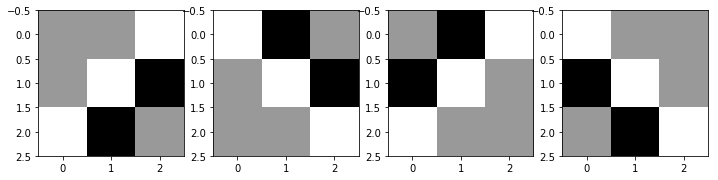

In [194]:
br = [[0, 0, 1],             # How are these diagonals
      [0, 1, -1.5],
      [1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

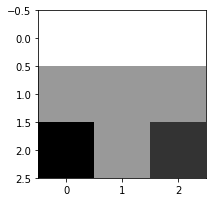

In [203]:
mat = [[1, 1, 1],
      [0, 0, 0],
      [-1.5, 0, -1]]

plot(mat)

#my_filter = mat#np.rot90(br)
#plot(my_filter)

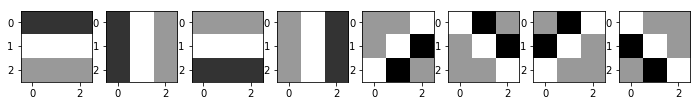

In [206]:
rots = straights + diags
plots(rots)

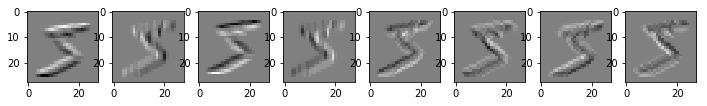

In [207]:
rots = straights + diags
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

In [221]:
a = np.array([2,4,45])
b = np.array([23,4,5])

#c= [a[i] + b[i] for i in range(len(a))]

np.add(a, b)

array([25,  8, 50])

In [208]:
eights = [images[i] for i in range(n) if labels[i]==8]
ones=[images[i] for i in range(n) if labels[i]==1]
print("Hello")

Hello


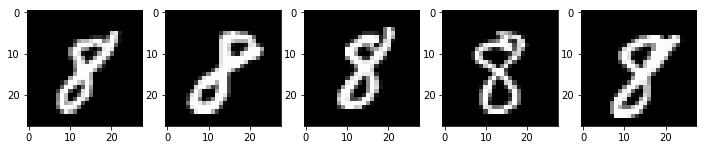

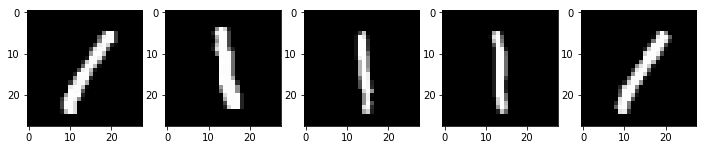

In [37]:
plots(eights[:5])
plots(ones[:5])